In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

##1.1

#load the csv file
file_path = 'Building_Energy_Benchmarking.csv'

#place the csv file into a dateframe
df = pd.read_csv(file_path) 

#display shape, columns and data types
display(df.shape)
display(df.columns)
display(df.dtypes)


(494, 31)

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'ENERGY STAR Score',
       'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)',
       'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
       'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
       'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'District Hot Water Use (GJ)',
       'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
       'Green Power - Onsite and Offsite (kWh)',
       'Avoided Emissions - Ons

Property Id                                                                int64
Property Name                                                             object
Address 1                                                                 object
City                                                                      object
Postal Code                                                               object
Province                                                                  object
Primary Property Type - Self Selected                                     object
Number of Buildings                                                        int64
Year Built                                                                 int64
Property GFA - Self-Reported (m²)                                         object
ENERGY STAR Score                                                        float64
Site Energy Use (GJ)                                                      object
Weather Normalized Site Ener

In [35]:
##1.1

#sum the null values in the dataframe 
null_value = df.isnull().sum()

#create a new dataframe, with null values greater than zero in the column
null_value_dataframe = null_value[null_value>0].reset_index()

#print out a dataframe with the column names, and the missing values
null_value_dataframe.columns = ['Column Name','Missing Values']

print(null_value_dataframe)



                                         Column Name  Missing Values
0                                  ENERGY STAR Score             329
1          Weather Normalized Source Energy Use (GJ)               2
2                               Natural Gas Use (GJ)              10
3                        District Hot Water Use (GJ)             479
4  Electricity Use – Generated from Onsite Renewa...             450
5             Green Power - Onsite and Offsite (kWh)             198
6  Avoided Emissions - Onsite and Offsite Green P...             198


In [36]:
##1.2 Handling Missing Data

missing_percentage = df.isnull().mean()*100
print(missing_percentage)


Property Id                                                               0.000000
Property Name                                                             0.000000
Address 1                                                                 0.000000
City                                                                      0.000000
Postal Code                                                               0.000000
Province                                                                  0.000000
Primary Property Type - Self Selected                                     0.000000
Number of Buildings                                                       0.000000
Year Built                                                                0.000000
Property GFA - Self-Reported (m²)                                         0.000000
ENERGY STAR Score                                                        66.599190
Site Energy Use (GJ)                                                      0.000000
Weat

I am going to drop the values for Green Power, Avoided Emissions, District Hot Water Use, Electricity Use. I am going to keep the Energy Star Score column for now and not alter it at all because question 4.2, mentions using the score for a t test

In [37]:
##1.2 Handling Missing Data

df = df.drop(['Green Power - Onsite and Offsite (kWh)', 'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)',
              'District Hot Water Use (GJ)','Electricity Use – Generated from Onsite Renewable Systems (kWh)'], axis = 1)

missing_percentage = df.isnull().mean()*100
print(missing_percentage)

Property Id                                    0.000000
Property Name                                  0.000000
Address 1                                      0.000000
City                                           0.000000
Postal Code                                    0.000000
Province                                       0.000000
Primary Property Type - Self Selected          0.000000
Number of Buildings                            0.000000
Year Built                                     0.000000
Property GFA - Self-Reported (m²)              0.000000
ENERGY STAR Score                             66.599190
Site Energy Use (GJ)                           0.000000
Weather Normalized Site Energy Use (GJ)        0.000000
Site EUI (GJ/m²)                               0.000000
Weather Normalized Site EUI (GJ/m²)            0.000000
Source Energy Use (GJ)                         0.000000
Weather Normalized Source Energy Use (GJ)      0.404858
Source EUI (GJ/m²)                             0

Weather Normalized Source Energy Use (GJ), and the Natural Gas Use column are filled with an object data type, we will need to convert it to clean the data, by getting rid of any commas, symbols, and then convert the data to numeric values. Once that is done we can find the median for the categories and then fill the nulls with that.  

In [38]:
##1.2 

#Use regex to clean string data and remove any non-numerica characters, then we will utilize the pd.to.numeric function to covert the values to floats
df['Natural Gas Use (GJ)'] = df['Natural Gas Use (GJ)'].astype(str).str.replace(r',', '', regex=True)
df['Natural Gas Use (GJ)'] = pd.to_numeric(df['Natural Gas Use (GJ)'], errors='coerce')

#Use regex to clean string data and remove any non-numerica characters, then we will utilize the pd.to.numeric function to covert the values to floats
df['Weather Normalized Source Energy Use (GJ)'] = df['Weather Normalized Source Energy Use (GJ)'].astype(str).str.replace(r',', '', regex=True)
df['Weather Normalized Source Energy Use (GJ)'] = pd.to_numeric(df['Weather Normalized Source Energy Use (GJ)'], errors='coerce')

#calculate the median in the Natural gas column, and then fill the nulls with that values, print the median value for a check
NGU_median = df['Natural Gas Use (GJ)'].median()
df['Natural Gas Use (GJ)'] = df['Natural Gas Use (GJ)'].fillna(NGU_median)
print(f' The median for Natural Gas use is : {NGU_median}')

#calculate the median in the Weather normalized source energy use column, and then fill the nulls with that values, print the median value for a check
WNSourceEU_median = df ['Weather Normalized Source Energy Use (GJ)'].median()
df['Weather Normalized Source Energy Use (GJ)'] = df['Weather Normalized Source Energy Use (GJ)'].fillna(WNSourceEU_median)
print(f' The median for Weather Normalized Source Energy Use is : {WNSourceEU_median}')

#double check that the percentages for the nulls are now zero. 
missing_percentage = df.isnull().mean()*100
print(missing_percentage)

#double check that they data types are now floats 
display(df.dtypes)


 The median for Natural Gas use is : 1569.75
 The median for Weather Normalized Source Energy Use is : 3144.8
Property Id                                    0.00000
Property Name                                  0.00000
Address 1                                      0.00000
City                                           0.00000
Postal Code                                    0.00000
Province                                       0.00000
Primary Property Type - Self Selected          0.00000
Number of Buildings                            0.00000
Year Built                                     0.00000
Property GFA - Self-Reported (m²)              0.00000
ENERGY STAR Score                             66.59919
Site Energy Use (GJ)                           0.00000
Weather Normalized Site Energy Use (GJ)        0.00000
Site EUI (GJ/m²)                               0.00000
Weather Normalized Site EUI (GJ/m²)            0.00000
Source Energy Use (GJ)                         0.00000
Weather No

Property Id                                     int64
Property Name                                  object
Address 1                                      object
City                                           object
Postal Code                                    object
Province                                       object
Primary Property Type - Self Selected          object
Number of Buildings                             int64
Year Built                                      int64
Property GFA - Self-Reported (m²)              object
ENERGY STAR Score                             float64
Site Energy Use (GJ)                           object
Weather Normalized Site Energy Use (GJ)        object
Site EUI (GJ/m²)                              float64
Weather Normalized Site EUI (GJ/m²)           float64
Source Energy Use (GJ)                         object
Weather Normalized Source Energy Use (GJ)     float64
Source EUI (GJ/m²)                            float64
Weather Normalized Source EU

##1.3 Extracting and Cleaning Data Using Regex

We now need to use regex, to convert some of the other columns from texts with commas to just integers. We will utilize loops instead of writing in each of the columns names. 

In [39]:
#list the columns that need to be cleaned
clean_columns = ['Property GFA - Self-Reported (m²)', 'Weather Normalized Site Energy Use (GJ)', 'Site Energy Use (GJ)','Source Energy Use (GJ)', 'Direct GHG Emissions (Metric Tons CO2e)', 'Total GHG Emissions (Metric Tons CO2e)', 'Electricity Use - Grid Purchase (kWh)' ]


def clean_and_convert(column):
    """This function will take in the columns that need to be converted from object to floats.It will utilize regex to turn the strings into numerical values by replacing columns with nothing. 
    """

    #use regex to take string data type values from the column, and replace the commas with nothing. 
    df[column] = df[column].astype(str).str.replace(r',', '', regex = True)

    #convert the values to numerical data
    df[column] = pd.to_numeric(df[column], errors = 'coerce')


#loop through the columns listed in clean column, apply the function
for i in clean_columns:
    clean_and_convert(i)

#double check that they data types are now floats 
display(df.dtypes)




Property Id                                     int64
Property Name                                  object
Address 1                                      object
City                                           object
Postal Code                                    object
Province                                       object
Primary Property Type - Self Selected          object
Number of Buildings                             int64
Year Built                                      int64
Property GFA - Self-Reported (m²)             float64
ENERGY STAR Score                             float64
Site Energy Use (GJ)                          float64
Weather Normalized Site Energy Use (GJ)       float64
Site EUI (GJ/m²)                              float64
Weather Normalized Site EUI (GJ/m²)           float64
Source Energy Use (GJ)                        float64
Weather Normalized Source Energy Use (GJ)     float64
Source EUI (GJ/m²)                            float64
Weather Normalized Source EU

In [40]:
##1.3 Standardize postal codes to follow canadian format 


def clean_postal (postal_code):
    '''Function will take in the values of the postal code and utilize regex to standardize the format to Canadian requirements A1A 1A1
    '''
    
    #remove the non alphanumeric symbols and the convert the postal code to uppercase
    code_clean = re.sub(r"[^a-zA-Z0-9]", "", str(postal_code)).upper()

    #if the entry is Non, NAN empty return None
    if code_clean in ['None', 'NAN', '']:
        return None
    
    #if the postal code is not equal to 6 characters return none
    if len(code_clean)!= 6:
        return None
    #format the characters occordingly 
    return (f'{code_clean[:3]} {code_clean[3:]}')

df['Postal Code'] = df['Postal Code'].apply(clean_postal)

print(df['Postal Code'])
    

0      T2H 0Z4
1      T2E 7L7
2      T2G 0W2
3      T2G 0G2
4      T2G 4M7
        ...   
489    T2G 1T7
490    T2C 2X1
491    T2N 3G8
492    T2W 4H7
493    T3A 5G1
Name: Postal Code, Length: 494, dtype: object


In [41]:
#1.3 clean and extract meaningful text from Property Names and Addresses

def extract_address_components(df, address_1):
    ''' This function will take in the adress column and then  extract a the street number, street type, street name, and quadrant
    '''

    #create regex expressions to split the address components 
    stnumber_pattern = r'\d{1,5}' #makes sure there are 1 to 5 digits for the street numbers
    st_type_pattern = r'\b(av|ave|blvd|bv|dr|rd|road|st|tr|trail|way|wy|building)\b' #look for the common street types 
    quad_pattern = r'\b(sw|se|nw|ne)\b'

    #create collumns to hold each of the components 
    df['Street Number'] = ''
    df['Street Name'] = ''
    df['Street Type'] = ''
    df['Quadrant'] = ''

    #iterate through the rows 
    for i, rows in df.iterrows():
        address = rows.get(address_1, '')  #get the address from the column name
        if not isinstance(address, str): #skip if the address is'nt a string
            continue

        address = address.lower().strip() #convert the address to lowercase, and remove and leading or trailing spaces

        #extract the street number
        num_match = re.search(stnumber_pattern, address) #look for the street number pattern
        number = num_match.group() if num_match else '' #extract the number if it is found
        address = re.sub(stnumber_pattern, '', address, count=1).strip()  #remove the number from the address 


        #extract the street type
        type_match = re.search(st_type_pattern, address) #look for the street type pattern
        st_type = type_match.group() if type_match else '' #extract the street type if it is found
        address = re.sub(st_type_pattern, '', address, count=1).strip() #remove the street type from the address

        #extract the quadrant data
        quad_match = re.search(quad_pattern, address)  #loof for the quadrant pattern
        quad = quad_match.group() if quad_match else '' #Extract the quadrant if it is found
        address = re.sub(quad_pattern, '', address, count=1).strip() #remove the quadrant from the address

        #whatever is left after the extraction is the street name
        st_name = address

        #update the datafram with the extracted components 
        df.loc[i, 'Street Number'] = number
        df.loc[i, 'Street Name'] = st_name
        df.loc[i, 'Street Type'] = st_type
        df.loc[i, 'Quadrant'] = quad

    return df #return the new dataframe

df = extract_address_components(df, 'Address 1')
print(df[['Street Number', 'Street Name', 'Street Type', 'Quadrant']]) #show changed columns

print(df['Street Type'].unique())
print(df[['Street Number', 'Street Name', 'Street Type', 'Quadrant']].dtypes)

    Street Number    Street Name Street Type Quadrant
0            9009      fairmount          dr       se
1            2924             11          st       ne
2             315             10          av       se
3             133              6          av       se
4            2201       portland          st       se
..            ...            ...         ...      ...
489           311             34          av       se
490          4705             76          av       se
491          1940      westmount          bv       nw
492          2607            106          av       sw
493         10071  hidden valley          dr       nw

[494 rows x 4 columns]
['dr' 'st' 'av' 'building' 'rd' 'tr' 'bv' 'ave' 'blvd' 'wy' '' 'way'
 'trail' 'road']
Street Number    object
Street Name      object
Street Type      object
Quadrant         object
dtype: object


There are repeats in the code av, ave and bv, blvd. We will need to standardize this. We also need to change the street number column to a integer data type. 

In [47]:
#1.3

# we need to normalize the mapping for the street types 
street_type_normalization = {'av': 'Avenue','ave': 'Avenue','blvd': 'Boulevard','bv': 'Boulevard','dr': 'Drive','rd': 'Road','road': 'Road','st': 'Street',
    'tr': 'Trail', 'trail': 'Trail','way': 'Way','wy': 'Way','building': 'Building'}


#now will use mapping to normalize the street types 
df['Street Type Normalized'] = df['Street Type'].apply(lambda x: street_type_normalization.get(x.lower(), x))

#select the columns for the final output
final_df = df[['Street Number', 'Street Name', 'Street Type Normalized', 'Quadrant']]

#will use loc method to get enforce the data types, and to standardize the capitalization 
def enforce_data_types(df):
    ''' Function will take in te df columns and return a dataframe with normalized data types and capitalized street types and quadrants
    '''
    df.loc[:, 'Street Number'] = pd.to_numeric(df['Street Number'], errors='coerce').astype('Int64') #allow for the conversion to integers
    df.loc[:, 'Street Name'] = df['Street Name'].astype(str).str.upper() #change all street names to capitals
    df.loc[:, 'Street Type Normalized'] = df['Street Type Normalized'].astype(str).str.upper() #change all street types to capitals
    df.loc[:, 'Quadrant'] = df['Quadrant'].astype(str).str.upper()  #conver the quadrant string to capitals

    #double check that each item is the correct data type
    df = df.astype({'Street Number': 'Int64',  'Street Name': 'object', 'Street Type Normalized': 'object',  'Quadrant': 'object'})

    return df #return the dataframe

# Apply data type enforcement
final_df = enforce_data_types(final_df)

#print the dataframe 
print(final_df)

#append the dataframe data as a single line into the original data frame, print it out to make sure it is there. 
df['Address Clean'] = final_df.apply(lambda row: f"{row['Street Number']} {row['Street Name']} {row['Street Type Normalized']} {row['Quadrant']}", axis=1)


#refine the propery name colun

df['Property Name'] = df['Property Name'].str.replace(r'[^\w\s]','', regex = True)


# display the orignal df with the new column
print(df)




     Street Number    Street Name Street Type Normalized Quadrant
0             9009      FAIRMOUNT                  DRIVE       SE
1             2924             11                 STREET       NE
2              315             10                 AVENUE       SE
3              133              6                 AVENUE       SE
4             2201       PORTLAND                 STREET       SE
..             ...            ...                    ...      ...
489            311             34                 AVENUE       SE
490           4705             76                 AVENUE       SE
491           1940      WESTMOUNT              BOULEVARD       NW
492           2607            106                 AVENUE       SW
493          10071  HIDDEN VALLEY                  DRIVE       NW

[494 rows x 4 columns]
     Property Id                   Property Name                  Address 1  \
0       10176804  Acadia Aquatic  Fitness Centre       9009 Fairmount Dr SE   
1        6169481          

In [48]:
##Part 2: Exploratory Data Analysis (EDA) and Aggregations 
#first we need to find all off the data types, and use only the ones with floats, possibly integers and then show the summary stats for those columns

print(df.dtypes)



Property Id                                     int64
Property Name                                  object
Address 1                                      object
City                                           object
Postal Code                                    object
Province                                       object
Primary Property Type - Self Selected          object
Number of Buildings                             int64
Year Built                                      int64
Property GFA - Self-Reported (m²)             float64
ENERGY STAR Score                             float64
Site Energy Use (GJ)                          float64
Weather Normalized Site Energy Use (GJ)       float64
Site EUI (GJ/m²)                              float64
Weather Normalized Site EUI (GJ/m²)           float64
Source Energy Use (GJ)                        float64
Weather Normalized Source Energy Use (GJ)     float64
Source EUI (GJ/m²)                            float64
Weather Normalized Source EU

In [49]:
##2.1 Statistical Summary
#we are only going to use the float columns the integer columns, yeaer ending, number of buildings, year built and property id dont matter to us
# we care more about the emissions data and eneregy use. 

df.select_dtypes(include=['float64']).describe() 

,Property GFA - Self-Reported (m²),ENERGY STAR Score,Site Energy Use (GJ),Weather Normalized Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source Energy Use (GJ),Weather Normalized Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ)
count,494.000000,165.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000
mean,4752.556883,44.836364,8265.670040,8397.193117,1.774798,1.810324,10590.527733,10221.438866,2.282753,2.319717,724.276316,158.671660,281.868826,63.821862,6.011028e+05,5520.693522
std,10128.320688,30.244187,19733.748811,19877.336939,1.306700,1.331529,23438.866328,22866.650000,1.597846,1.622897,1490.433401,109.472637,884.613506,56.835735,1.184414e+06,17218.457051
min,113.000000,1.000000,141.000000,146.000000,0.060000,0.060000,237.000000,146.000000,0.110000,0.110000,15.000000,10.200000,0.000000,0.000000,1.076580e+04,3.000000
25%,1096.650000,17.000000,1232.825000,1256.150000,0.990000,1.000000,1601.525000,1562.825000,1.312500,1.350000,113.850000,93.100000,43.000000,33.325000,1.074446e+05,861.050000
50%,1806.750000,46.000000,2555.650000,2572.500000,1.290000,1.310000,3238.600000,3144.800000,1.680000,1.690000,228.400000,117.600000,78.700000,43.900000,2.237719e+05,1569.750000
75%,4257.900000,76.000000,7999.050000,8006.575000,2.065000,2.110000,10242.400000,9637.275000,2.622500,2.652500,696.550000,186.975000,247.425000,74.050000,5.492725e+05,4816.200000
max,85941.000000,94.000000,243202.000000,242611.000000,8.430000,8.360000,261481.000000,260399.000000,10.130000,10.060000,13067.000000,666.200000,12243.000000,386.000000,9.786193e+06,238415.000000


Looking at the first column's property GFA we can see that the mean of 4753 is much higher than the median of 1807. It can therefore be considered right-skewed and there are likely quite a few large properties that are causing the the average to be muh higher. For the site energy use data the mean is 8266 but the max is over 243000, therefore there is a very large range, and there are likely some extreme outliers. The total GHG emissions column shows a very wide spread from 15 to 13067, meaning there is a lot of variation. Some properties may be very large emitters. The Direct GHG emissions column, shows a zero value for the minimum. This is likely due to clean energy. Others are extremely high which could be due to the nature of fuel they are using, fossil fuels possibly coal. Both the elctricity use and Natural gas use columns show extreme outliers. The max is significantly different from the mean also indicating a small minority of properties that require a lot of natural gas. 

In [54]:
##2.2 Aggregations 

#Compute average Energy Use Intensity (EUI) by Property Type.
EUI_by_PT= df.groupby(['Primary Property Type - Self Selected'])['Site EUI (GJ/m²)'].agg('mean')

print(EUI_by_PT)

Primary Property Type - Self Selected
Distribution Center                                 3.286000
Fire Station                                        1.208827
Fitness Center/Health Club/Gym                      4.385000
Heated Swimming Pool                                4.805333
Ice/Curling Rink                                    2.182200
Indoor Arena                                        1.106000
Mixed Use Property                                  0.458000
Museum                                              1.584000
Non-Refrigerated Warehouse                          0.768000
Office                                              1.519636
Other                                               0.070000
Other - Public Services                             1.526000
Other - Recreation                                  2.165000
Performing Arts                                     1.302000
Repair Services (Vehicle, Shoe, Locksmith, etc.)    1.248000
Self-Storage Facility                          

In [55]:
##2.2 Compute the total Greenhouse Gas (GHG) emissions by year.

TGHG_by_year = df.groupby('Year Ending')['Total GHG Emissions (Metric Tons CO2e)'].sum()

print(TGHG_by_year)

Year Ending
2019    75605.4
2020    66617.2
2021    68136.9
2022    72301.0
2023    75132.0
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64


In [67]:
#2.3 Identify the top 5 properties with the highest total energy consumption.

#first clean the site energy use column in GJ
df['Site Energy Use (GJ)'] = pd.to_numeric(df['Site Energy Use (GJ)'].astype(str).str.replace(r'[^\d.]', '', regex=True),errors='coerce')

#Group by property name 
T5P = df.sort_values(by='Site Energy Use (GJ)',ascending=False).head(5)
print(T5P[['Property Name', 'Site Energy Use (GJ)']])

#shows top five properties by energy use, need 5 different properties


#shows top five properties with highest total energy use, aggregate total energy use by using sum function
t5p = (df.groupby(['Property Name'])['Site Energy Use (GJ)'].sum().sort_values(ascending=False).head(5))
print(t5p)



                     Property Name  Site Energy Use (GJ)
293        Stoney Transit Facility              243202.0
457        Stoney Transit Facility              160486.0
372        Stoney Transit Facility              146772.3
244        Stoney Transit Facility              101625.5
173  Village Square Leisure Centre              100146.6
Property Name
Stoney Transit Facility                               726554.8
Municipal Complex                                     406124.1
Village Square Leisure Centre                         396268.1
Southland Leisure Centre                              245215.1
Foothills Aquatic Centre and Bauer and Bush Arenas    122386.6
Name: Site Energy Use (GJ), dtype: float64


In [76]:
##2.3 Detecting Outlier Using Regex and IQR

#Using the values from the describe table previously, the Q1 and Q3 are 113.85 and 696.55

quart1 = 113.85
quart3 = 696.55

# Calculate Q1 and Q3
Q1 = 113.85
Q3 = 696.55
IQR = Q3 - Q1


# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify outliers
outlier_condition = (df['Total GHG Emissions (Metric Tons CO2e)'] < lower_bound) | (df['Total GHG Emissions (Metric Tons CO2e)'] > upper_bound)

#extract the outliers 
outliers = df[outlier_condition]

#print out the number of outliers
print(f'The number of outliers before replacement: {outliers.shape[0]}')

median = 228.4 #the median is 228.4 from the describe table above

#fill in the outliers with the median
df.loc[outlier_condition, 'Total GHG Emissions (Metric Tons CO2e)']= median


# Recalculate outliers after replacement
outliers_after = df[(df['Total GHG Emissions (Metric Tons CO2e)'] < lower_bound) | (df['Total GHG Emissions (Metric Tons CO2e)'] > upper_bound)]

# Display the number of outliers after replacement
print(f"Number of outliers after replacement: {outliers_after.shape[0]}")



Lower Bound: -760.1999999999999
Upper Bound: 1570.6
The number of outliers before replacement: 46
Number of outliers after replacement: 0


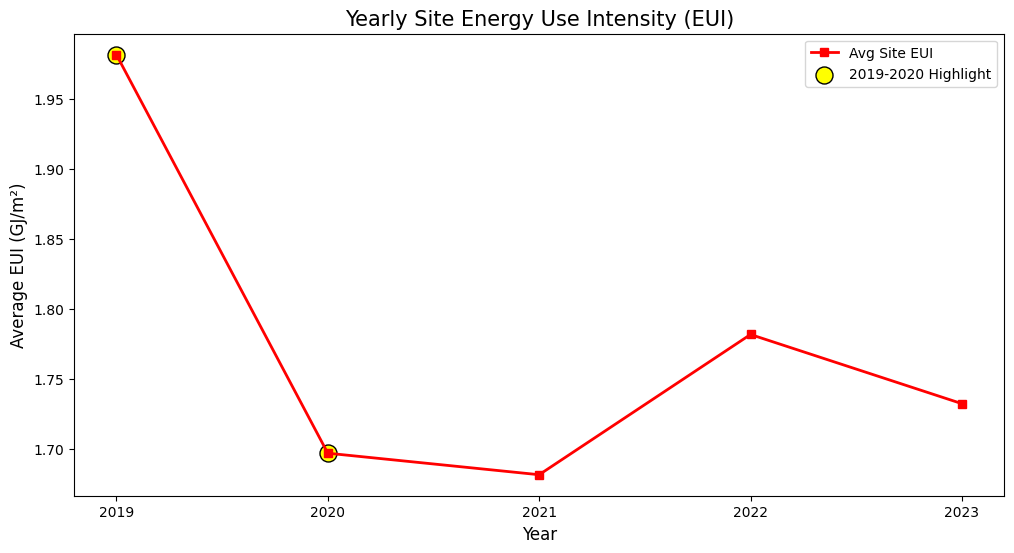

In [82]:
##Part 3: Data Visualization 

##3.1
#group the data by the year 
eui_by_year = df.groupby('Year Ending')['Site EUI (GJ/m²)'].mean().reset_index()

#calculate the changes every year
eui_by_year['Yearly Change'] = eui_by_year['Site EUI (GJ/m²)'].diff()

plt.figure(figsize=(12, 6))


#plot the average Site EUI trend with a red line and square markers
plt.plot(eui_by_year['Year Ending'], eui_by_year['Site EUI (GJ/m²)'], 
         marker='s', linestyle='-', linewidth=2, color='red', label='Avg Site EUI')

#highlight the years 2019 to 2020, where the change occurs
highlight = eui_by_year[(eui_by_year['Year Ending'] >= 2019) & (eui_by_year['Year Ending'] <= 2020)]

plt.scatter(highlight['Year Ending'], highlight['Site EUI (GJ/m²)'], 
            color='yellow', s=150, edgecolor='black', label='2019-2020 Highlight')


#add title and labels 
plt.title('Yearly Site Energy Use Intensity (EUI)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average EUI (GJ/m²)', fontsize=12)

#Use only whole years in the x axis
plt.xticks(eui_by_year['Year Ending'].astype(int))


#add a legend 
plt.legend(loc='upper right')


plt.show()


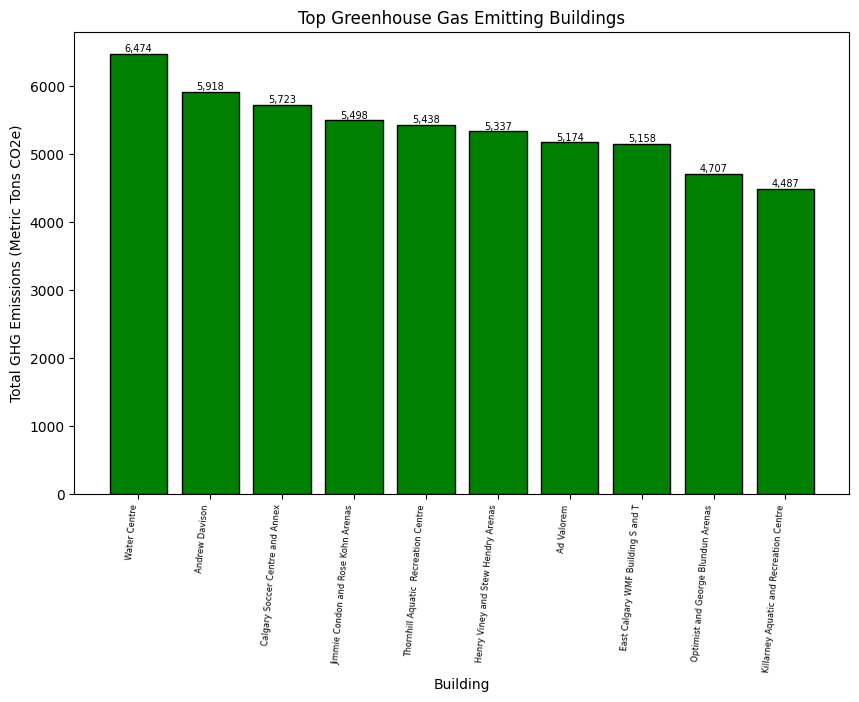

In [91]:
##3.2 Comparative Bar Charts 

#group by property name and sum the total emissions
top_buildings_by_name = df.groupby('Property Name')['Total GHG Emissions (Metric Tons CO2e)'].sum().sort_values(ascending=False).head(10).reset_index()

#olot a vertical bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_buildings_by_name['Property Name'], top_buildings_by_name['Total GHG Emissions (Metric Tons CO2e)'],color='green', edgecolor='black')

#fills the bars with the emission values
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=7)


plt.xlabel('Building')
plt.ylabel('Total GHG Emissions (Metric Tons CO2e)')
plt.title('Top Greenhouse Gas Emitting Buildings')
plt.xticks(rotation=85, ha='right', fontsize=6)  
plt.show()



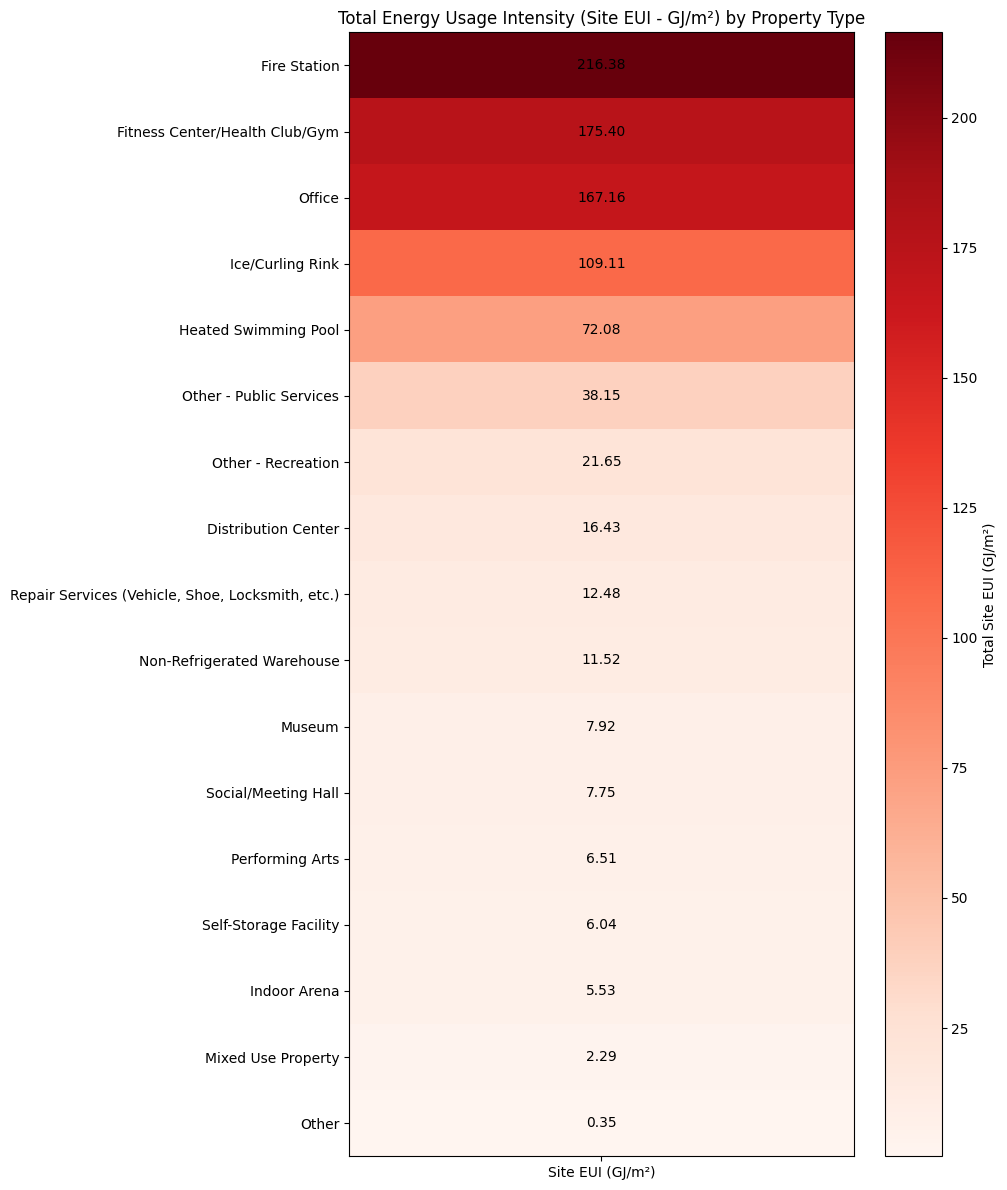

In [92]:
##3.3

#group the data by property type and sum the site EUI values
energy_by_type = df.groupby(['Primary Property Type - Self Selected'])['Site EUI (GJ/m²)'].sum().reset_index()

#sort the data for better visualization
energy_by_type = energy_by_type.sort_values(by='Site EUI (GJ/m²)', ascending=False)

#plot the heatmap
plt.figure(figsize=(10, 12))
plt.imshow(energy_by_type[['Site EUI (GJ/m²)']], aspect='auto', cmap='Reds')

#add the color bar
plt.colorbar(label='Total Site EUI (GJ/m²)')

#format the chart
plt.yticks(ticks=range(len(energy_by_type)), labels=energy_by_type['Primary Property Type - Self Selected'])
plt.xticks([0], ['Site EUI (GJ/m²)'])
plt.title('Total Energy Usage Intensity (Site EUI - GJ/m²) by Property Type')

#add the site EUI value in the cells
for i in range(len(energy_by_type)):
    value = energy_by_type['Site EUI (GJ/m²)'].iloc[i]
    plt.text(0, i, f'{value:.2f}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

In [96]:
##Part 4: Further Analysis

#4.1 Correlation Analysis
# Selecting relevant columns for correlation analysis
correlation_data_pandas_clean = df[['Site Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (m²)']]

# Computing the correlation matrix
correlation_matrix_pandas = correlation_data_pandas_clean.corr()

# Display the correlation matrix
print(correlation_matrix_pandas)



                                        Site Energy Use (GJ)  \
Site Energy Use (GJ)                                1.000000   
Total GHG Emissions (Metric Tons CO2e)              0.108780   
Property GFA - Self-Reported (m²)                   0.725977   

                                        Total GHG Emissions (Metric Tons CO2e)  \
Site Energy Use (GJ)                                                  0.108780   
Total GHG Emissions (Metric Tons CO2e)                                1.000000   
Property GFA - Self-Reported (m²)                                     0.170822   

                                        Property GFA - Self-Reported (m²)  
Site Energy Use (GJ)                                             0.725977  
Total GHG Emissions (Metric Tons CO2e)                           0.170822  
Property GFA - Self-Reported (m²)                                1.000000  


From the data from the correlation matrix, the correlation between Site Energy Use or energy consumption and Total GHG Emissions is 0.187. The correlation between Site Energy USe or energy consumption and property size is 0.7259, and the correlation between Total GHG Emissions and Property size is 0.1708. We can see that their is a strong correlation between Site Energy Use and the Property size. Which makes sense, larger buildings will likely use more energy. The correlation between the other two relationships is fairly weak. There does not seem to be a relationship between Site Energy Use and Total GHG emissions, same with total GHG Emissions and Property Size. This could be due to operational efficiencys , larger buildings may be LEED certified or be utilizing different energy. 

In [ ]:
##4.2 Hypothesis Testing 

from scipy.stats import ttest_ind

#drop the null values from Energy Star Score
df = df.dropna(subset=['ENERGY STAR Score'])

#group the energy star score by property type
df_hyptest = df.groupby(['Primary Property Type - Self Selected'])['ENERGY STAR Score'].apply(list)

#print the list to see what categories we have
print(df_hyptest)

#compare offices and Non-Regrierated Warehouse
office = df_hyptest['Office']
NRW = df_hyptest['Non-Refrigerated Warehouse']

#perform the independet t-test
t_stat, p_val = ttest_ind(office, NRW, equal_var=False)

#print the p-value and interpretation
print(f'p_val = {p_val}')

if p_val < 0.05:
    print('There is a statistically significant difference for the Average ENERGY STAR Score between Offices and Non-Refrigerated Warehouses.')
else:
    print('There is no statistically significant difference for the Average ENERGY STAR Score between Offices and Non-Refrigerated Warehouses.')


Primary Property Type - Self Selected
Distribution Center                                  [10.0, 1.0, 1.0, 1.0, 1.0]
Ice/Curling Rink              [60.0, 11.0, 34.0, 50.0, 15.0, 25.0, 7.0, 20.0...
Museum                                                                   [31.0]
Non-Refrigerated Warehouse    [83.0, 93.0, 68.0, 81.0, 85.0, 76.0, 79.0, 91....
Office                        [32.0, 80.0, 84.0, 1.0, 61.0, 77.0, 1.0, 45.0,...
Self-Storage Facility                            [15.0, 14.0, 17.0, 14.0, 14.0]
Name: ENERGY STAR Score, dtype: object
1.3873627803989809e-05
There is a statistically significant difference for the Average ENERGY STAR Score between Offices and Non-Refrigerated Warehouses.
